In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import igc_tools
import math_utils
import xc_analysis
import os
import matplotlib.ticker as mtick

%load_ext autoreload
%autoreload 2

In [5]:
igc_directory = "xcleague_tahoe"
igc_dict = {}
for root, dirs, files in os.walk(igc_directory):
   for name in files:
      if name.endswith(".igc"):
        filepath = os.path.join(root, name)
        igc_dict[name[:-4]] = igc_tools.IGCLog(filepath)

/Users/rbarlow/Documents/igc_review/igc_tools.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe["glide"][self.dataframe["vertical_speed_gnss_average_ms"] > -0.4] = np.nan
/Users/rbarlow/Documents/igc_review/igc_tools.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.dataframe["glide"][self.dataframe["vertical_speed_gnss_average_ms"] > -0.4] = np.nan
/Users/rbarlow/Documents/igc_review/igc_tools.py:233: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [6]:
igc_dict.keys()

dict_keys(['Doug DeGeorge.923.7', 'Robert Barlow.961.33', 'Lynsey Haynes.669.52', 'Jake Rendina.824.5', 'Rocki Bonilla.1054.72', 'Jay Gordon.195.10'])

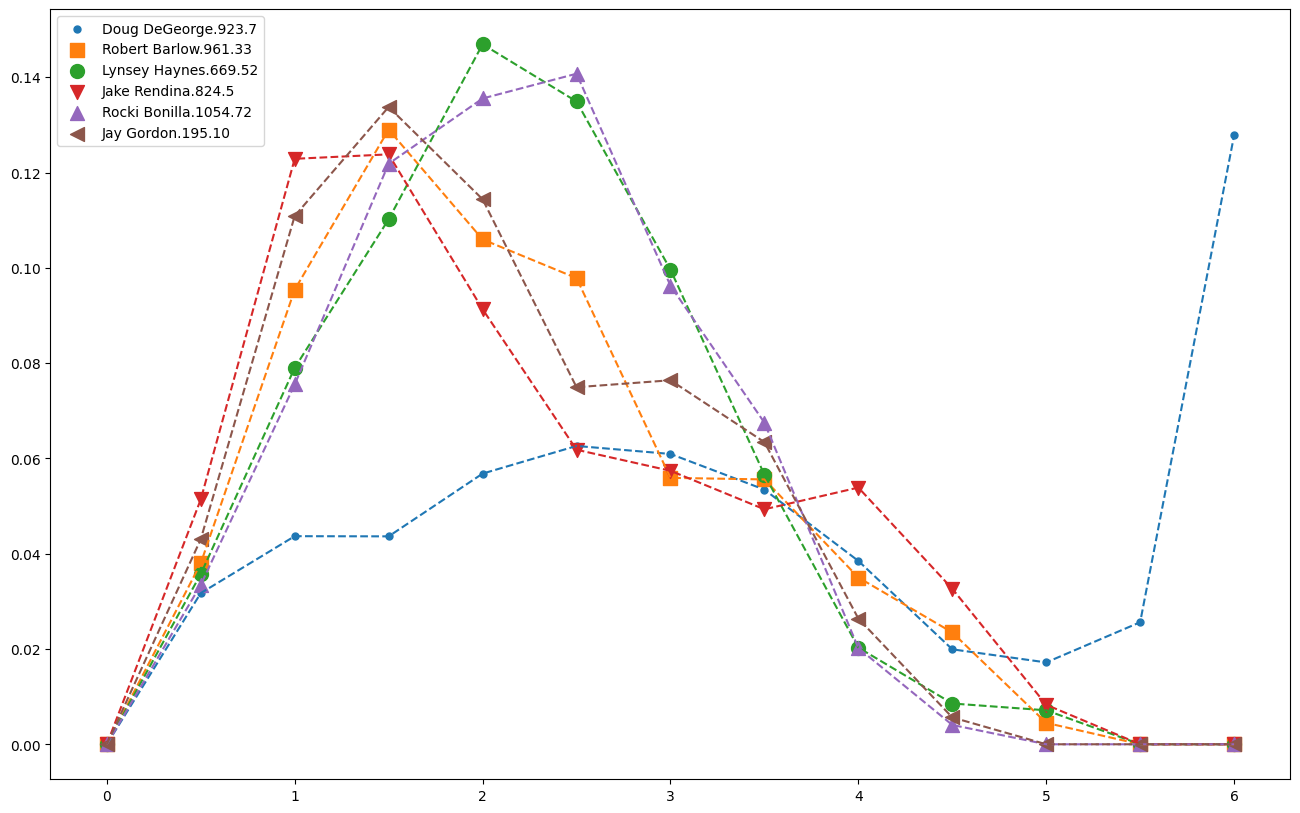

In [7]:
markers = [m for m, func in Line2D.markers.items()
                    if func != 'nothing']

fig, ax = plt.subplots(figsize = (16, 10))
m_i = 0
for name, igc_log in igc_dict.items():
    bin_sizes, bins = xc_analysis.bin_by_thermal_strength(igc_log.dataframe["vertical_speed_gnss_average_ms"].rolling(20, center = True).mean())
    ax.scatter(bin_sizes, bins, label = name, marker=markers[m_i], s=100)
    ax.plot(bin_sizes, bins, "--")
    m_i+=1
ax.legend()